In [1]:
import gym
import numpy as np
np.random.seed(0)
# 环境使用
env = gym.make("Blackjack-v0")
env = env.unwrapped
env.seed(0)
print('观察空间 = {}'.format(env.observation_space))
print('动作空间 = {}'.format(env.action_space))
print('动作数量 = {}'.format(env.action_space.n))

观察空间 = Tuple(Discrete(32), Discrete(11), Discrete(2))
动作空间 = Discrete(2)
动作数量 = 2


In [2]:
def ob2state(observation):
    # 分别是：玩家的点数，庄家的亮牌, 是否把A作为11
    return observation[0], observation[1], int(observation[2])

def play_once(env,policy):
    total_reward = 0
    observation = env.reset()
    print('观测 = {}'.format(observation))
    while True:
        print('玩家 = {}, 庄家 = {}'.format(env.player, env.dealer))
        # 状态
        state = ob2state(observation)
        action = np.random.choice(env.action_space.n, p=policy[state])
        print('动作 = {}'.format(action))
        observation, reward, done, _ = env.step(action)
        print('观测 = {}, 奖励 = {}, 结束指示 = {}'.format(
                observation, reward, done))
        total_reward += reward
        if done:
            return total_reward # 回合结束

policy = np.zeros((22, 11, 2, 2))
# >= 18 时收手
policy[18:, :, :, 0] = 1
# < 18 时继续
policy[:18, :, :, 1] = 1

print("奖励：{}".format(play_once(env,policy)))

观测 = (18, 1, False)
玩家 = [10, 8], 庄家 = [1, 7]
动作 = 0
观测 = (18, 1, False), 奖励 = 0.0, 结束指示 = True
奖励：0.0


In [3]:
import matplotlib.pyplot as plt

# def evaluate_action_monte_carlo(env, policy, episode_num=500000):
#     q = np.zeros_like(policy)
#     c = np.zeros_like(policy)
#     for _ in range(episode_num):
#         # 玩一回合
#         state_actions = []
#         observation = env.reset()
#         while True:
#             state = ob2state(observation)
#             action = np.random.choice(env.action_space.n, p=policy[state])
#             state_actions.append((state, action))
#             observation, reward, done, _ = env.step(action)
#             if done:
#                 break # 回合结束
#         g = reward # 回报
#         for state, action in state_actions:
#             c[state][action] += 1.
#             q[state][action] += (g - q[state][action]) / c[state][action]
#     return q
#
# q = evaluate_action_monte_carlo(env, policy) # 动作价值
# v = (q * policy).sum(axis=-1) # 状态价值
#
def plot(data):
    fig, axes = plt.subplots(1, 2, figsize=(9, 4))
    titles = ['without ace', 'with ace']
    have_aces = [0, 1]
    extent = [12, 22, 1, 11]
    for title, have_ace, axis in zip(titles, have_aces, axes):
        dat = data[extent[0]:extent[1], extent[2]:extent[3], have_ace].T
        print(dat)
        axis.imshow(dat, cmap='gray',extent=extent, origin='lower')
        axis.set_xlabel('player sum')
        axis.set_ylabel('dealer showing')
        axis.set_title(title)


# plot(v)


In [4]:
# def monte_carlo_with_exploring_start(env, episode_num=500000):
#     policy = np.zeros((22, 11, 2, 2))
#     policy[:, :, :, 1] = 1.
#     q = np.zeros_like(policy)
#     c = np.zeros_like(policy)
#     for _ in range(episode_num):
#         # 这么做的原因是，希望所有的都能遍历到
#         # 随机选择起始状态和起始动作
#         state = (np.random.randint(12, 22),
#                  np.random.randint(1, 11),
#                  np.random.randint(2))
#         action = np.random.randint(2)
#         # 确定手上的牌
#         env.reset()
#         if state[2]: # 有A
#             env.player = [1, state[0] - 11]
#         else: # 没有A
#             if state[0] == 21:
#                 env.player = [10, 9, 2]
#             else:
#                 env.player = [10, state[0] - 10]
#         env.dealer[0] = state[1]
#         state_actions = []
#         while True:
#             state_actions.append((state, action))
#             observation, reward, done, _ = env.step(action)
#             if done:
#                 break # 回合结束
#             state = ob2state(observation)
#             action = np.random.choice(env.action_space.n, p=policy[state])
#         g = reward # 回报
#         for state, action in state_actions:
#             c[state][action] += 1.
#             q[state][action] += (g - q[state][action]) / c[state][action]
#             a = q[state].argmax()
#             policy[state] = 0.
#             policy[state][a] = 1.
#     return policy, q
#
# policy, q = monte_carlo_with_exploring_start(env)
# v = q.max(axis=-1)
#
# plot(policy.argmax(-1))
# plot(v)
#

[[1 1 1 1 1 0 0 0 0 0]
 [1 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 0 0 0 0 0]
 [1 1 1 1 1 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0]]
[[1 1 1 1 1 1 0 0 0 0]
 [1 1 1 1 1 1 0 0 0 0]
 [1 1 1 1 1 1 0 0 0 0]
 [1 1 1 1 1 1 0 0 0 0]
 [1 1 1 1 1 1 0 0 0 0]
 [1 1 1 1 1 0 0 0 0 0]
 [1 1 1 1 1 1 0 0 0 0]
 [1 1 1 1 1 1 0 0 0 0]
 [1 1 1 1 1 1 1 0 0 0]
 [1 1 1 1 1 1 0 0 0 0]]
[[-0.53510064 -0.58305329 -0.61498303 -0.64453802 -0.6674203  -0.63311615
  -0.39559137 -0.10956175  0.13426926  0.64128912]
 [-0.29436003 -0.28241335 -0.28312817 -0.43208584 -0.29310793 -0.12453532
   0.12429379  0.4029304   0.64068826  0.86131387]
 [-0.24658679 -0.26331889 -0.25934127 -0.25910064 -0.25230883 -0.08154373
   0.15890125  0.42173913  0.63684697  0.89779326]
 [-0.21001088 -0.20521173 -0.23081038 -0.1962872  -0.19248826 -0.1044009
   0.16181008  0.40748819  0.67322747  0.91040462]
 [-0.18800103 -0.17779705 -0.17145247 -

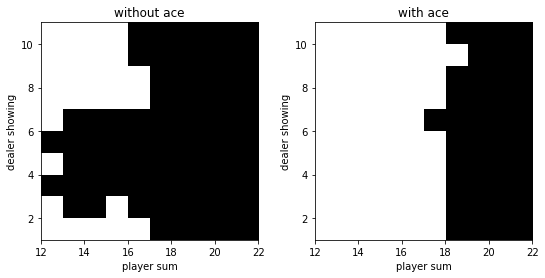

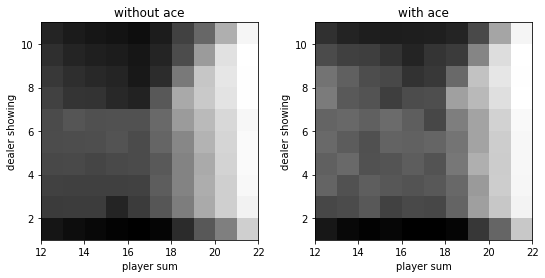

In [5]:
# 基于柔性策略的回合更新

import matplotlib.pyplot as plt
def monte_carlo_with_soft(env, episode_num=500000, epsilon=0.1):
    policy = np.ones((22, 11, 2, 2)) * 0.5 # 柔性策略
    q = np.zeros_like(policy)
    c = np.zeros_like(policy)
    for _ in range(episode_num):
        # 玩一回合
        state_actions = []
        observation = env.reset()
        while True:
            state = ob2state(observation)
            action = np.random.choice(env.action_space.n, p=policy[state])
            state_actions.append((state, action))
            observation, reward, done, _ = env.step(action)
            if done:
                break # 回合结束
        g = reward # 回报
        for state, action in state_actions:
            c[state][action] += 1.
            q[state][action] += (g - q[state][action]) / c[state][action]
            # 更新策略为柔性策略
            a = q[state].argmax()
            policy[state] = epsilon / 2.
            policy[state][a] += (1. - epsilon)
    return policy, q

policy, q = monte_carlo_with_soft(env)
v = q.max(axis=-1)

plot(policy.argmax(-1))
plot(v)
